In [11]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import random
import statistics

from ipywidgets import interact
import ipywidgets as widgets

In [73]:

def agrupa_genotipo(pop,N):
    random.shuffle(pop)
    pop_novo = []
    
    pop_novo.append( pop[0] + pop[1] )
    i=1
    while i < N :
        
        pop_novo.append( pop[i*2] + pop[(i*2) + 1]  )
        
        i+=1
    
    return pop_novo


def cria_pesos(pop,w1,w2,w3):
    pop = sorted(pop)
    pesos= []
    
    for i in range(len(pop)):
        if pop[i] == 0:
            pop[i] = 0
            pesos.append(w1)
            
        elif pop[i] == 1:#sorteia qual gene o ser heterozigoto passa para proxima geracao
            chance = random.randint(1,100)
            if chance <= 50:
                pop[i] = 0
                pesos.append(w1)
            else:
                pop[i] = 1
                pesos.append(w2)
                
        elif pop[i] == 2:
            pop[i] = 1
            pesos.append(w3)
        
    return pop , pesos
            

def calc_freq(pop,N):
    cont=0
    for i in range(len(pop)):
        cont += pop[i]
        
    return cont / (2*N)
        
    



In [107]:

def main(N,G,p0,w1,w2,w3):
    pop =[]
    freq = []

    populacao=[]

    for i in range(2*N): #cria primeira populacao aleatoria
        if i < (p0*2*N):
            pop.append(1)
        else:
            pop.append(0)


    pop = agrupa_genotipo(pop,N)

    for i in range(G):

        pop, pesos = cria_pesos(pop,w1,w2,w3)
        
    

        populacao.append(pop)# ter vetor de tamanho G

        pop = random.choices(pop, weights = pesos, k = 2*N)
    

        pop = agrupa_genotipo(pop,N)
        
    


    for i in range(len(populacao)): 

        freq.append( calc_freq(populacao[i], N) )



    plt.plot( range(len(freq)) , freq , label = " Frequencia " )
    #plt.scatter( range(len(freq)) , freq)

    plt.xlim( [0, 100])#definir limites do grafico
    plt.ylim([0,0.12])#definir limites do grafico
    plt.legend()    
    plt.show



    




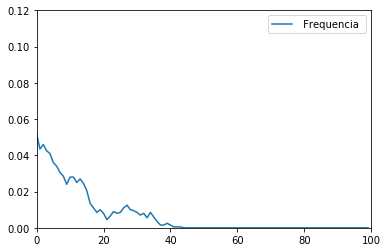

In [109]:

N = 1000
G = 100
p0 = 0.1 

w1 = 1
w2 = 0.95
w3 = 0.9


main(N,G,p0,w1,w2,w3)